<h1>Импорт библиотек

In [13]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [15]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(X[0] @ V[0])
    for i in range(len(X)):
        result += X[i] @ V[i]
    return result

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    result = sum_prod(X, V)
    expected = np.array([[44], [64]]) 
    assert np.array_equal(result, expected)
    print("Тест для sum_prod пройден!")

test_sum_prod()

Тест для sum_prod пройден!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [16]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)


def test_binarize():
    M = np.array([[0.1, 0.6], [0.4, 0.9]])
    result = binarize(M, 0.5)
    expected = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result, expected)
    print("Тест для binarize пройден!")

test_binarize()

Тест для binarize пройден!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [17]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]


def test_unique():
    mat = np.array([[1, 2, 1], [3, 3, 3], [1, 2, 3]])
    row_uniques = unique_rows(mat)
    col_uniques = unique_columns(mat)
    print("Тесты для unique функций пройдены!")

test_unique()

Тесты для unique функций пройдены!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

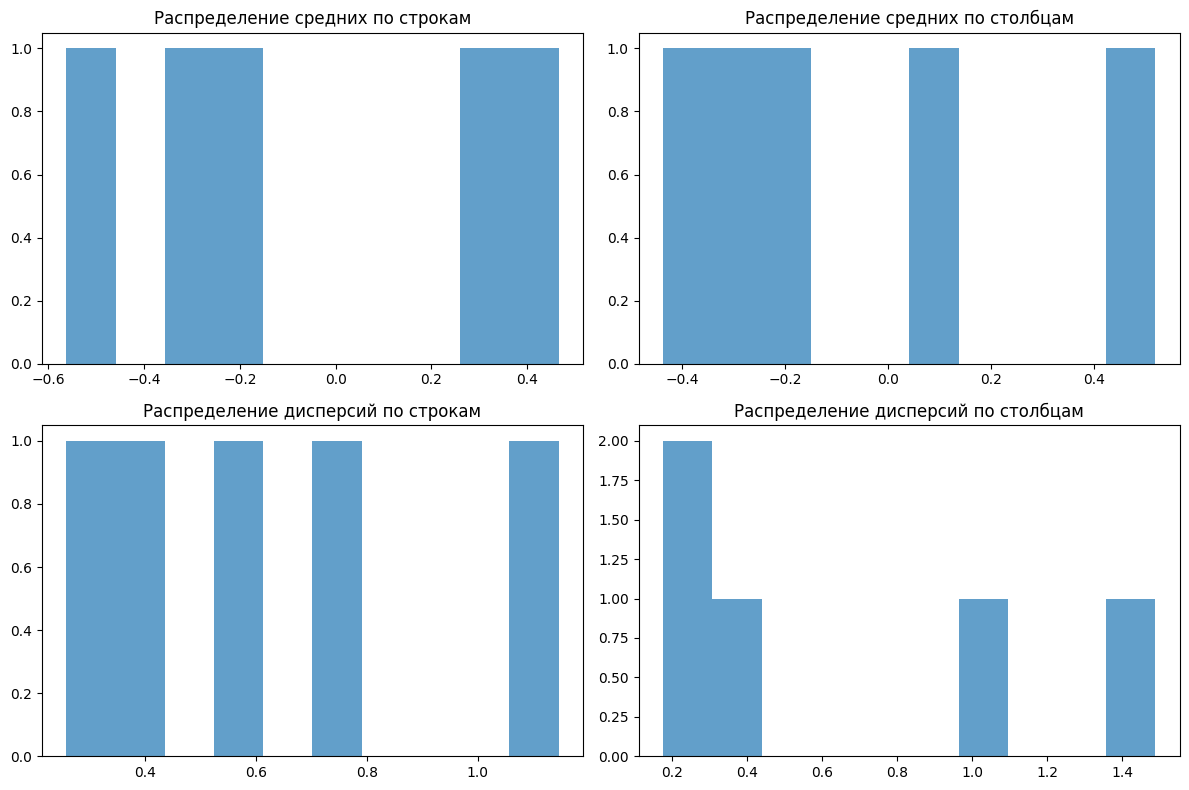

(array([[-0.12488351, -1.31606995, -0.03707391, -1.30504463,  1.59948585],
        [-0.05216895, -0.77245045,  0.65197868, -0.3354666 , -1.14697145],
        [ 0.44549127, -0.30850822,  0.33204421,  0.58351663,  1.27419416],
        [-1.1238753 , -0.25895322, -0.58555388, -1.66496907,  0.82159779],
        [-0.57913652,  0.46987634, -0.12721008,  1.65592077,  0.04632799]]),
 array([-0.23671723, -0.33101575,  0.46534761, -0.56235073,  0.2931557 ]),
 array([1.14606634, 0.38094034, 0.25704271, 0.7077958 , 0.57737677]),
 array([-0.2869146 , -0.4372211 ,  0.046837  , -0.21320858,  0.51892687]),
 array([0.28073496, 0.35118525, 0.17695825, 1.48861541, 0.9656426 ]))

In [18]:
def analyze_matrix(m, n):
 
    matrix = np.random.normal(0, 1, (m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.hist(row_means, bins=10, alpha=0.7)
    plt.title('Распределение средних по строкам')
    
    plt.subplot(2, 2, 2)
    plt.hist(col_means, bins=10, alpha=0.7)
    plt.title('Распределение средних по столбцам')
    
    plt.subplot(2, 2, 3)
    plt.hist(row_vars, bins=10, alpha=0.7)
    plt.title('Распределение дисперсий по строкам')
    
    plt.subplot(2, 2, 4)
    plt.hist(col_vars, bins=10, alpha=0.7)
    plt.title('Распределение дисперсий по столбцам')
    
    plt.tight_layout()
    plt.show()
    
    return matrix, row_means, row_vars, col_means, col_vars


analyze_matrix(5, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [19]:
def chess(m, n, a, b):
    board = np.full((m, n), a)
    board[1::2, ::2] = b
    board[::2, 1::2] = b
    return board

def test_chess():
    result = chess(3, 3, 0, 1)
    expected = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
    assert np.array_equal(result, expected)
    print("Тест для chess пройден!")

test_chess()

Тест для chess пройден!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Тесты для draw функций пройдены!


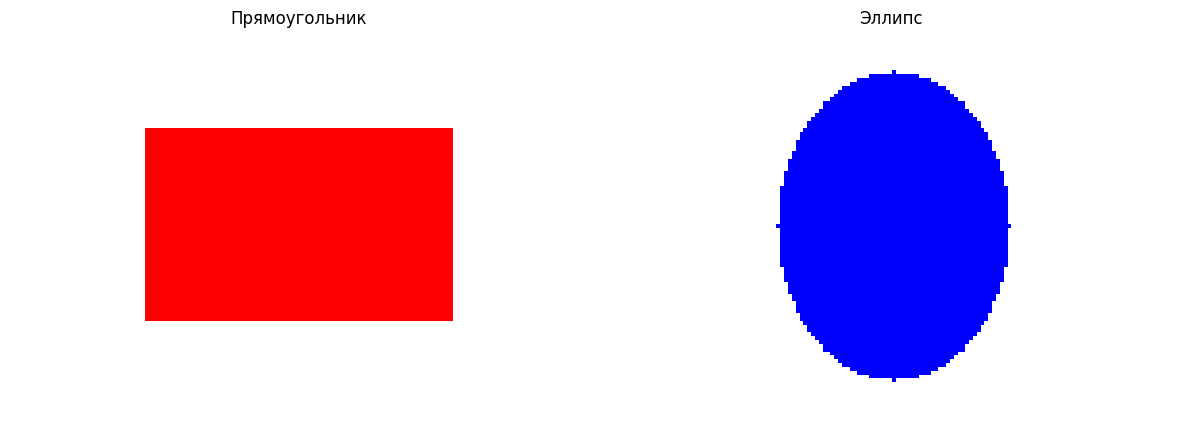

In [26]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    start_i = (m - a) // 2
    start_j = (n - b) // 2
  
    image[start_i:start_i+a, start_j:start_j+b] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):

    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    center_i, center_j = m // 2, n // 2
    
    for i in range(m):
        for j in range(n):
            if ((i - center_i) / a) ** 2 + ((j - center_j) / b) ** 2 <= 1:
                image[i, j] = ellipse_color
    
    return image

def test_draw():

    rect = draw_rectangle(2, 3, 5, 5, [255, 0, 0], [0, 0, 0])
    assert rect.shape == (5, 5, 3)
    assert rect[2, 2, 0] == 255  
    
    ellipse = draw_ellipse(2, 2, 5, 5, [0, 255, 0], [0, 0, 0])
    assert ellipse.shape == (5, 5, 3)
    assert ellipse[2, 2, 1] == 255  
    
    print("Тесты для draw функций пройдены!")


def show_examples():
  
    rect_image = draw_rectangle(50, 80, 100, 150, [255, 0, 0], [255, 255, 255])
    
   
    ellipse_image = draw_ellipse(40, 30, 100, 150, [0, 0, 255], [255, 255, 255])
    
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rect_image)
    plt.title('Прямоугольник')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(ellipse_image)
    plt.title('Эллипс')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


test_draw()
show_examples() 

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [27]:
def analyze_time_series(series, window_size):
  
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    

    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)
    
   
    moving_avg = []
    for i in range(len(series) - window_size + 1):
        window = series[i:i + window_size]
        moving_avg.append(np.mean(window))
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg
    }


series = [1, 3, 7, 1, 2, 6, 0, 1]
result = analyze_time_series(series, 3)
print(result)

{'mean': 2.625, 'variance': 5.734375, 'std': 2.394655507583502, 'local_maxima': [2, 5], 'local_minima': [3, 6], 'moving_average': [3.6666666666666665, 3.6666666666666665, 3.3333333333333335, 3.0, 2.6666666666666665, 2.3333333333333335]}


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [36]:
def one_hot_encoding(labels):

    labels = np.array(labels)
    if len(labels) == 0:
        return np.array([])
    
    num_classes = np.max(labels) + 1
    result = np.zeros((len(labels), num_classes), dtype=int)
    
    result[np.arange(len(labels)), labels] = 1
    
    return result

def test_one_hot():
    labels = [0, 2, 3, 0]
    result = one_hot_encoding(labels)
    expected = np.array([
        [1, 0, 0, 0],  
        [0, 0, 1, 0],  
        [0, 0, 0, 1],  
        [1, 0, 0, 0]   
    ])
    print("Результат для [0, 2, 3, 0]:")
    print(result)
    print("Ожидалось:")
    print(expected)
    assert np.array_equal(result, expected)
    

    labels2 = [1, 0, 2]
    result2 = one_hot_encoding(labels2)
    expected2 = np.array([
        [0, 1, 0], 
        [1, 0, 0],
        [0, 0, 1]   
    ])
    print("\nРезультат для [1, 0, 2]:")
    print(result2)
    assert np.array_equal(result2, expected2)
    

    labels3 = [0, 4]
    result3 = one_hot_encoding(labels3)
    expected3 = np.array([
        [1, 0, 0, 0, 0],  
        [0, 0, 0, 0, 1]   
    ])
    print("\nРезультат для [0, 4]:")
    print(result3)
    assert np.array_equal(result3, expected3)
    
    print("\nВсе тесты для one_hot_encoding пройдены!")

test_one_hot()

Результат для [0, 2, 3, 0]:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
Ожидалось:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]

Результат для [1, 0, 2]:
[[0 1 0]
 [1 0 0]
 [0 0 1]]

Результат для [0, 4]:
[[1 0 0 0 0]
 [0 0 0 0 1]]

Все тесты для one_hot_encoding пройдены!
